In [1]:
#Installing Packages
%matplotlib inline
import numpy as np
import pandas as pd
import nltk


!pip install scikit-plot

import re
import string

import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import gensim
from gensim.models.doc2vec import Doc2Vec,TaggedDocument

#Nltk resource downloading
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
#Mounting Drive
!pip install kora -q
from kora import drive
drive.mount("/content/drive/")
drive.link_nbs()

     |████████████████████████████████| 57 kB 2.7 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
Mounted at /content/drive/


**Data Preparation**


In [ ]:
#Data Loading
import data_pre_processing as dpp
X_train,Y_train = dpp.get_pre_processed_train_data()

In [ ]:
X_test,Y_test = dpp.get_pre_processed_test_data()

In [ ]:
#Saving Pre-Processed  Training File
X_train.to_csv('X_train.csv')
!cp X_train.csv "drive/MyDrive/Colab Notebooks/amazon_reviews_pre_processed_data/"

Y_train.to_csv('Y_train.csv')
!cp Y_train.csv "drive/MyDrive/Colab Notebooks/amazon_reviews_pre_processed_data/"

In [ ]:
#Saving Pre-Processed  Test File
X_test.to_csv('X_test.csv')
!cp X_test.csv "drive/MyDrive/Colab Notebooks/amazon_reviews_pre_processed_data/"

Y_test.to_csv('Y_test.csv')
!cp Y_test.csv "drive/MyDrive/Colab Notebooks/amazon_reviews_pre_processed_data/"

In [2]:
#Loading Pre-Processed File Exist
import os
file_path_x_train = "drive/MyDrive/Colab Notebooks/amazon_reviews_pre_processed_data/X_train.csv"
file_path_y_train = "drive/MyDrive/Colab Notebooks/amazon_reviews_pre_processed_data/Y_train.csv"
if os.path.isfile(file_path_x_train) and os.path.isfile(file_path_y_train) :
  X_train = pd.read_csv(file_path_x_train).fillna(' ')
  Y_train = pd.read_csv(file_path_y_train).fillna(' ')
  X_train = X_train.loc[:, ~X_train.columns.str.contains('^Unnamed')]
  Y_train = Y_train.loc[:, ~Y_train.columns.str.contains('^Unnamed')]
  print('----------Training Data Loaded---------------------')


----------Training Data Loaded---------------------


In [3]:
#Splitting the Data into Training and Validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=0, stratify=Y_train)
print(X_train.shape)
print(X_val.shape)

(2519999, 2)
(1080000, 2)


**Vector Creation**

In [5]:
#Creating Doc2Vec
base_location = "drive/MyDrive/Colab Notebooks/"
def feature_extract(dataset,location):
  # if os.path.exists(location):
  #       print('Found {}'.format(location))
  #       model = gensim.models.Doc2Vec.load(location)
  #       return np.array([model.docvecs[i] for i in range(len(model.docvecs))])
  data = dataset['title'] + '' + dataset['text']
  data = [nltk.word_tokenize(l) for l in data]
  tag_doc = [TaggedDocument(doc, [i]) for i, doc in enumerate(data)]
  model = Doc2Vec(tag_doc)
  # model.save(location)
  return np.array([model.docvecs[i] for i in range(len(model.docvecs))])

In [6]:
location = base_location + "amazon_reviews_models/Doc2Vec/d2vmodel"
doc2vec_train = feature_extract(X_train,location)

In [ ]:
print(f'No. of Features {doc2vec_train.shape[1]}')
#No. of features in word - Hundred

No. of Features 100


In [37]:
#Creating Doc2Vec For Validation
location = base_location + "amazon_reviews_models/Doc2Vec/d2vmodel_val"
doc2vec_val = feature_extract(X_val,location)

In [7]:
import joblib
#Saving Model
def save_model(model,filename):
  # save the model to disk
  joblib.dump(model, filename)
  print('Model Saved')

def get_model(filename):
  if os.path.isfile(filename):
    # load the model from disk
    print('Model Exist')
    loaded_model = joblib.load(filename)
    print('Model Loaded')
    return loaded_model
  print('Model does not exist')
  return None

**Training Models**

**1.Naive Bayes**

In [13]:
#GaussianNB
# Checking If Model Exist then load it.
gaussian_nb_model_file_path = base_location + 'amazon_reviews_models/Doc2Vec/gausssian_nb_model.sav'
# gaussian_nb_model =  get_model(gaussian_nb_model_file_path)
gaussian_nb_model =  None
if gaussian_nb_model is None: 
  # Build the classifier
  gaussian_nb_model = GaussianNB()
  #  Train the classifier
  gaussian_nb_model.fit(doc2vec_train, y_train)
  save_model(gaussian_nb_model,gaussian_nb_model_file_path)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Saved


In [14]:
#BernoulliNB
# Checking If Model Exist then load it.
bernoulli_nb_model_file_path = base_location + 'amazon_reviews_models/Doc2Vec/bernoulli_nb_model.sav'
# bernoulli_nb_model =  get_model(bernoulli_nb_model_file_path)
bernoulli_nb_model = None
if bernoulli_nb_model is None:
  # Build the classifier
  bernoulli_nb_model = BernoulliNB()
  #  Train the classifier
  bernoulli_nb_model.fit(doc2vec_train, y_train)
  save_model(bernoulli_nb_model,bernoulli_nb_model_file_path)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Saved


**Logistic Regression**

In [18]:
#Logistic Regression
# Checking If Model Exist then load it.
log_reg_model_file_path = base_location + 'amazon_reviews_models/Doc2Vec/log_reg_model.sav'
# log_reg_model =  get_model(log_reg_model_file_path)
log_reg_model = None
if log_reg_model is None:
  log_reg_model = Pipeline([('standardscaler', StandardScaler(with_mean=False)),
                 ('logisticregression', LogisticRegression(random_state=42,solver='lbfgs', max_iter=1000))])
  log_reg_model.fit(doc2vec_train, y_train)
  save_model(log_reg_model,log_reg_model_file_path)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Saved


**Linear SVM**

In [19]:
from sklearn.svm import LinearSVC
# Checking If Model Exist then load it.
linear_svc_model_file_path = base_location + 'amazon_reviews_models/Doc2Vec/linear_svc_model.sav'
# linear_svc_model =  get_model(linear_svc_model_file_path)
linear_svc_model = None
if linear_svc_model is None:
  linear_svc_model = Pipeline([('standardscaler', StandardScaler(with_mean=False)),
                 ('linearsvm', LinearSVC(tol=1e-5))])
  linear_svc_model.fit(doc2vec_train, y_train)
  save_model(linear_svc_model,linear_svc_model_file_path)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Saved


**Decision Tree Classifier**

In [24]:
#Finding Best Hyperparameter For Decision Tree
params = {
 'decisiontreeclassifier__max_depth': [10,15,20],
 'decisiontreeclassifier__min_samples_split': [2,4,6], 
 'decisiontreeclassifier__min_samples_leaf':[100,200,300]
}
# Checking If Model Exist then load it.
decision_tree_model_file_path = base_location + 'amazon_reviews_models/Doc2Vec/decision_tree_model.sav'
# decision_tree_model =  get_model(decision_tree_model_file_path)
decision_tree_model = None
if decision_tree_model is None:
  decision_tree_model = Pipeline([('standardscaler', StandardScaler(with_mean=False)),
                 ('decisiontreeclassifier', DecisionTreeClassifier(max_depth=10,min_samples_split=4,min_samples_leaf=300))])
  # decision_tree_model_cv = GridSearchCV(decision_tree_model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
  decision_tree_model.fit(doc2vec_train, y_train)
  save_model(decision_tree_model,decision_tree_model_file_path)
  # bestParams = modelCV.best_params_
  # print(f"Decision Tree Best paramters: {bestParams})")


Model Saved


**Random Forest Classifier**

In [25]:
#Finding Best Hyperparameter For Random Forest
params = {
 'randomforestclassifier__max_depth': [10,15,20],
 'randomforestclassifier__min_samples_split': [2,4,6], 
 'randomforestclassifier__min_samples_leaf':[100,200,300]
}
# Checking If Model Exist then load it.
rf_model_file_path = base_location + 'amazon_reviews_models/Doc2Vec/rf_model.sav'
rf_model =  get_model(rf_model_file_path)
if rf_model is None:
  rf_model = Pipeline([('standardscaler', StandardScaler(with_mean=False)),
                 ('randomforestclassifier', 
                  RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=4,min_samples_leaf=300))])
  # rf_model_cv = GridSearchCV(rf_model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
  rf_model.fit(doc2vec_train, y_train)
  save_model( rf_model, rf_model_file_path)
  # rf_best_params = rf_model_cv.best_params_
  # print(f"Random Forest Best paramters: {rf_best_params})")

Model Exist


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22.2.post1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.2.post1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


Model Loaded


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.2.post1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator Pipeline from version 0.22.2.post1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


**Performance Evaluation**

In [10]:
def report(model,X,Y,modelName,report_type,accuracy_scores):
    YPred = model.predict(X)
    if report_type:
        print(f"{modelName} Training Data Result:\n================================================")
    else:
        print(f"{modelName} Test Data Result:\n================================================")
    model_accuracy_score = accuracy_score(Y, YPred) * 100
    print(f"Accuracy Score: {model_accuracy_score:.2f}%")
    print("_______________________________________________")
    clf_report = pd.DataFrame(classification_report(Y, YPred, output_dict=True))
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    skplt.metrics.plot_confusion_matrix(Y, YPred)
    accuracy_scores.append(model_accuracy_score)


**Training Data Performance**

Gaussian NB Model Training Data Result:
Accuracy Score: 64.72%
_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  6.844411e-01  6.224245e-01  0.647166  6.534328e-01  6.534328e-01
recall     5.461183e-01  7.482141e-01  0.647166  6.471662e-01  6.471661e-01
f1-score   6.075055e-01  6.795471e-01  0.647166  6.435263e-01  6.435263e-01
support    1.260000e+06  1.259999e+06  0.647166  2.519999e+06  2.519999e+06


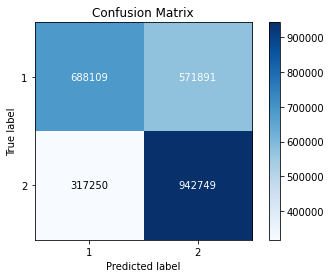

In [15]:
training_accuracy_scores = []
report(gaussian_nb_model,doc2vec_train, y_train,'Gaussian NB Model',True,training_accuracy_scores)

Bernoulli NB Model Training Data Result:
Accuracy Score: 70.21%
_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  7.076500e-01  6.969012e-01  0.702133  7.022756e-01  7.022756e-01
recall     6.888484e-01  7.154172e-01  0.702133  7.021328e-01  7.021328e-01
f1-score   6.981226e-01  7.060379e-01  0.702133  7.020802e-01  7.020802e-01
support    1.260000e+06  1.259999e+06  0.702133  2.519999e+06  2.519999e+06


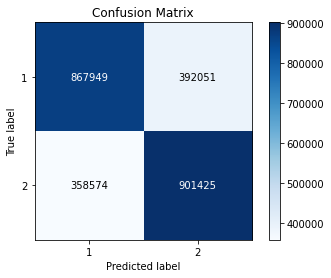

In [16]:
report(bernoulli_nb_model,doc2vec_train,y_train,'Bernoulli NB Model',True,training_accuracy_scores)

Logistic NB Model Training Data Result:
Accuracy Score: 77.89%
_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  7.819672e-01  7.758124e-01  0.778856  7.788898e-01  7.788898e-01
recall     7.733389e-01  7.843728e-01  0.778856  7.788559e-01  7.788559e-01
f1-score   7.776291e-01  7.800692e-01  0.778856  7.788491e-01  7.788491e-01
support    1.260000e+06  1.259999e+06  0.778856  2.519999e+06  2.519999e+06


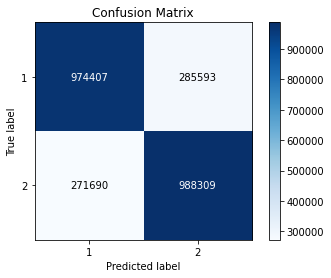

In [20]:
report(log_reg_model,doc2vec_train,y_train,'Logistic NB Model',True,training_accuracy_scores)

Linear SVC Model Training Data Result:
Accuracy Score: 77.87%
_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  7.878115e-01  7.700677e-01  0.778657  7.789396e-01  7.789396e-01
recall     7.627548e-01  7.945602e-01  0.778657  7.786575e-01  7.786575e-01
f1-score   7.750807e-01  7.821222e-01  0.778657  7.786015e-01  7.786015e-01
support    1.260000e+06  1.259999e+06  0.778657  2.519999e+06  2.519999e+06


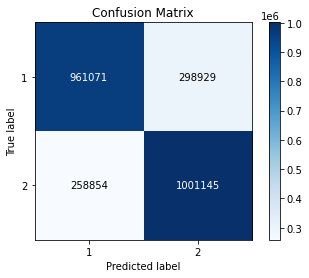

In [21]:
report(linear_svc_model,doc2vec_train,y_train,'Linear SVC Model',True,training_accuracy_scores)

Decision Tree Model Training Data Result:
Accuracy Score: 66.96%
_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  6.755572e-01  6.640366e-01  0.669601  6.697969e-01  6.697969e-01
recall     6.526397e-01  6.865632e-01  0.669601  6.696015e-01  6.696015e-01
f1-score   6.639007e-01  6.751120e-01  0.669601  6.695064e-01  6.695064e-01
support    1.260000e+06  1.259999e+06  0.669601  2.519999e+06  2.519999e+06


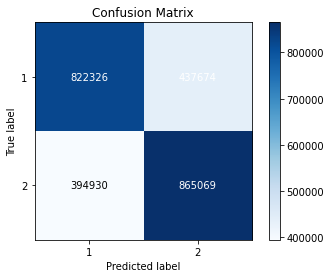

In [26]:
report(decision_tree_model,doc2vec_train,y_train,'Decision Tree Model',True,training_accuracy_scores)

Random Forest Model Training Data Result:
Accuracy Score: 53.36%
_______________________________________________
CLASSIFICATION REPORT:
                      1             2  accuracy     macro avg  weighted avg
precision  5.228776e-01  5.635721e-01  0.533647  5.432248e-01  5.432248e-01
recall     7.690143e-01  2.982788e-01  0.533647  5.336465e-01  5.336466e-01
f1-score   6.224984e-01  3.900944e-01  0.533647  5.062964e-01  5.062965e-01
support    1.260000e+06  1.259999e+06  0.533647  2.519999e+06  2.519999e+06


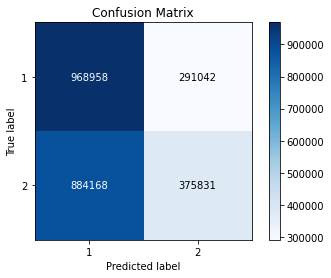

In [27]:
report(rf_model,doc2vec_train,y_train,'Random Forest Model',True,training_accuracy_scores)

**Validation Data Performance**

Gaussian NB Model Test Data Result:
Accuracy Score: 62.68%
_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy     macro avg  weighted avg
precision       0.672905       0.600159  0.626842  6.365319e-01  6.365319e-01
recall          0.493637       0.760046  0.626842  6.268417e-01  6.268417e-01
f1-score        0.569497       0.670705  0.626842  6.201009e-01  6.201009e-01
support    540000.000000  540000.000000  0.626842  1.080000e+06  1.080000e+06


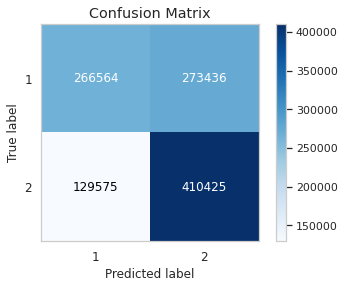

In [38]:
validation_accuracy_scores = []
report(gaussian_nb_model,doc2vec_val,y_val,'Gaussian NB Model',False,validation_accuracy_scores)

Bernoulli NB Model Test Data Result:
Accuracy Score: 67.88%
_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy     macro avg  weighted avg
precision       0.691795       0.667401  0.678769  6.795978e-01  6.795978e-01
recall          0.644813       0.712726  0.678769  6.787694e-01  6.787694e-01
f1-score        0.667478       0.689319  0.678769  6.783986e-01  6.783986e-01
support    540000.000000  540000.000000  0.678769  1.080000e+06  1.080000e+06


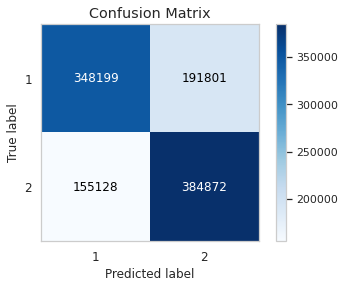

In [39]:
report(bernoulli_nb_model,doc2vec_val,y_val,'Bernoulli NB Model',False,validation_accuracy_scores)

Logistic Regression Model Test Data Result:
Accuracy Score: 72.51%
_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy     macro avg  weighted avg
precision       0.798008       0.680898  0.725134  7.394529e-01  7.394529e-01
recall          0.602867       0.847402  0.725134  7.251343e-01  7.251343e-01
f1-score        0.686846       0.755080  0.725134  7.209628e-01  7.209628e-01
support    540000.000000  540000.000000  0.725134  1.080000e+06  1.080000e+06


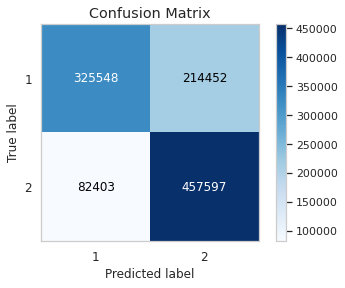

In [40]:
report(log_reg_model,doc2vec_val,y_val,'Logistic Regression Model',False,validation_accuracy_scores)

Linear SVC Model Test Data Result:
Accuracy Score: 72.30%
_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy     macro avg  weighted avg
precision       0.801805       0.676805  0.722981  7.393049e-01  7.393049e-01
recall          0.592394       0.853569  0.722981  7.229815e-01  7.229815e-01
f1-score        0.681373       0.754978  0.722981  7.181755e-01  7.181755e-01
support    540000.000000  540000.000000  0.722981  1.080000e+06  1.080000e+06


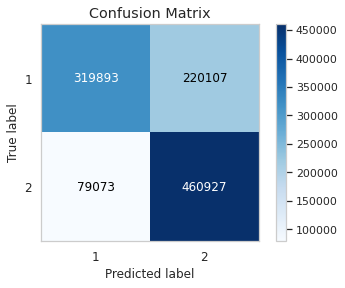

In [41]:
report(linear_svc_model,doc2vec_val,y_val,'Linear SVC Model',False,validation_accuracy_scores)

Decision Tree Model Training Data Result:
Accuracy Score: 63.44%
_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy     macro avg  weighted avg
precision       0.639499       0.629575  0.634354  6.345367e-01  6.345367e-01
recall          0.615913       0.652794  0.634354  6.343537e-01  6.343537e-01
f1-score        0.627484       0.640974  0.634354  6.342293e-01  6.342293e-01
support    540000.000000  540000.000000  0.634354  1.080000e+06  1.080000e+06


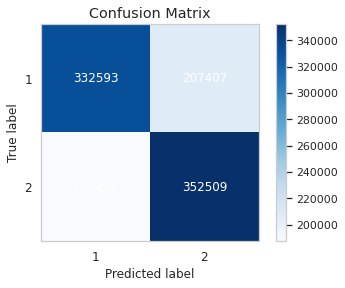

In [42]:
report(decision_tree_model,doc2vec_val,y_val,'Decision Tree Model',True,validation_accuracy_scores)

Random Forest Model Training Data Result:
Accuracy Score: 53.75%
_______________________________________________
CLASSIFICATION REPORT:
                       1              2  accuracy     macro avg  weighted avg
precision       0.527253       0.560042   0.53749  5.436475e-01  5.436475e-01
recall          0.725291       0.349689   0.53749  5.374898e-01  5.374898e-01
f1-score        0.610616       0.430546   0.53749  5.205811e-01  5.205811e-01
support    540000.000000  540000.000000   0.53749  1.080000e+06  1.080000e+06


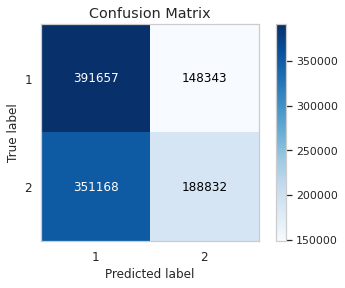

In [43]:
report(rf_model,doc2vec_val,y_val,'Random Forest Model',True,validation_accuracy_scores)

In [30]:
def create_barplot(df,x_label,y_label,x_col,y_col,filename):
    plt.figure(figsize=(12,6),dpi=100)
    plt.style.use('ggplot')
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x=x_col,y=y_col,data=df,palette="Set2")
    
    for bar in ax.patches:
      ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

    ax.set(xlabel=x_label, ylabel=y_label)
    ax.tick_params(axis='x', rotation=30)
    plt.setp(ax.patches, linewidth=0)
    # plt.legend(title = 'Team Name', bbox_to_anchor=(1, 1))
    file_path = f'drive/MyDrive/Colab Notebooks/amazon_reviews_model_results/{filename}.png'
    plt.savefig(file_path,bbox_inches = 'tight')
    plt.show()



In [44]:
print(f'Training Accuracy Score -- {training_accuracy_scores}')
print(f'Validation Accuracy Score -- {validation_accuracy_scores}')

Training Accuracy Score -- [64.71661298278293, 70.2132818306674, 77.8855864625343, 77.86574518481952, 66.9601456191054, 53.364664033596846]
Validation Accuracy Score -- [62.68416666666666, 67.87694444444445, 72.51342592592593, 72.29814814814814, 63.43537037037037, 53.748981481481486]


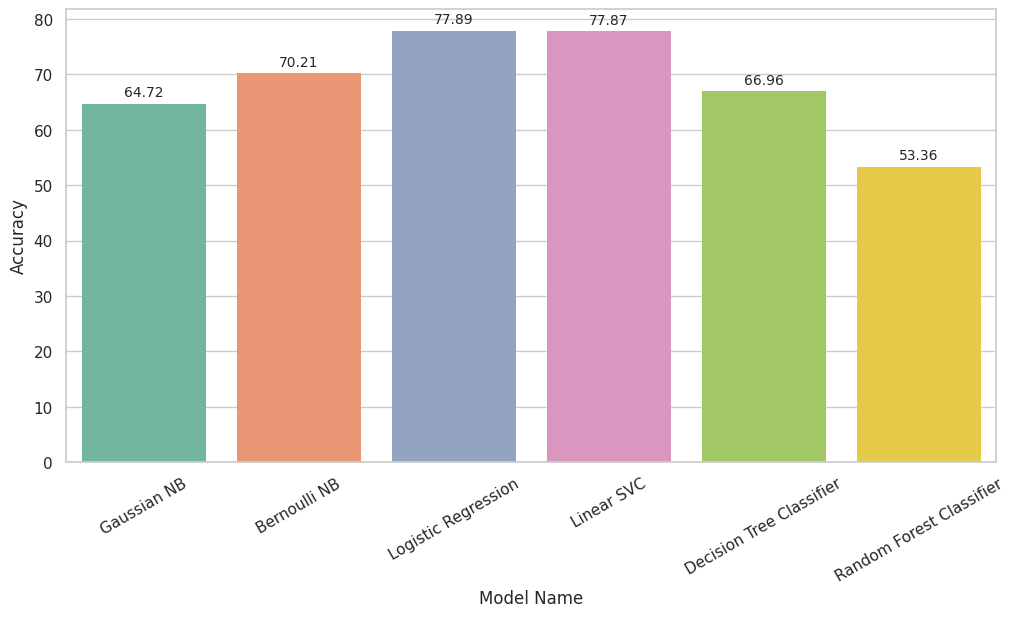

In [45]:
model_name_list = ['Gaussian NB','Bernoulli NB','Logistic Regression','Linear SVC','Decision Tree Classifier','Random Forest Classifier']
df_train = pd.DataFrame(model_name_list,columns=['model_name'])
df_train['accuracy_score'] = training_accuracy_scores
df_val = pd.DataFrame(model_name_list,columns=['model_name'])
df_val['accuracy_score'] = validation_accuracy_scores
create_barplot(df_train,'Model Name','Accuracy','model_name','accuracy_score','doc2vec_train_accuracy')

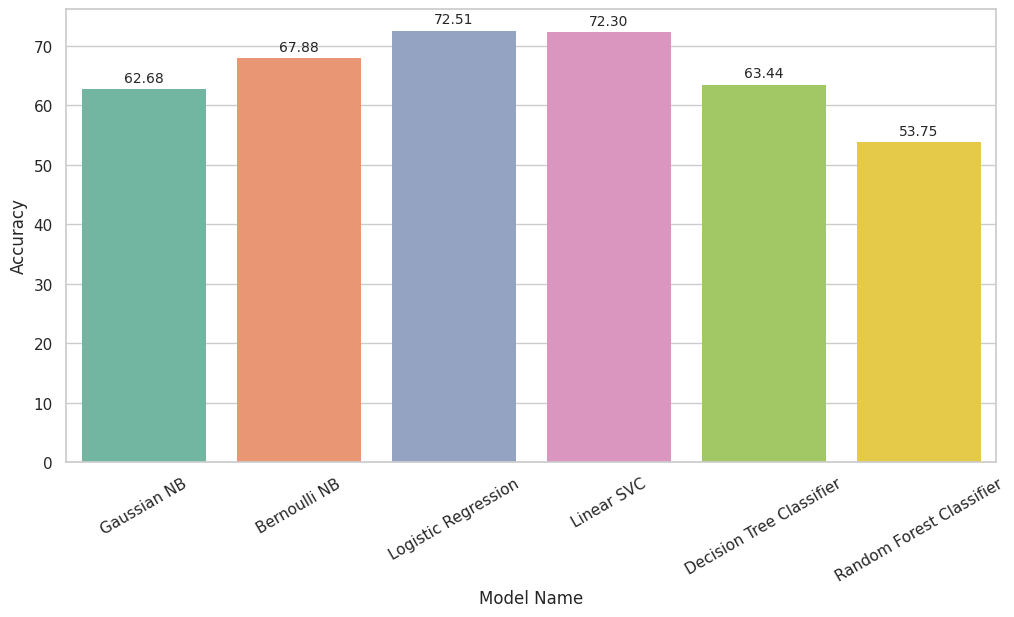

In [46]:
create_barplot(df_val,'Model Name','Accuracy','model_name','accuracy_score','doc2vec_val_accuracy')

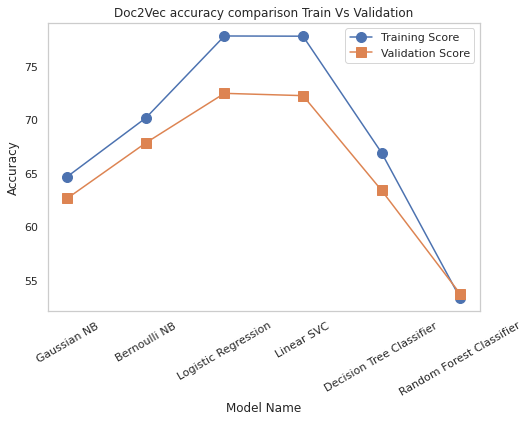

In [47]:
#Creating Canvas
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_ylabel('Accuracy')
ax.set_xlabel('Model Name')
ax.set_title('Doc2Vec accuracy comparison Train Vs Validation')

#Creating Multiline Plot
ax.plot(model_name_list,training_accuracy_scores, label="Training Score",marker='o',ms=10)
ax.plot(model_name_list,validation_accuracy_scores, label="Validation Score",marker='s',ms=10)

ax.grid(False)
ax.set_facecolor('white')
ax.legend()
ax.tick_params(axis='x', rotation=30)
file_path = f'drive/MyDrive/Colab Notebooks/amazon_reviews_model_results/doc2vec_accuracy_comp.png'
plt.savefig(file_path,bbox_inches = 'tight')
plt.show()
plt.close()

**Best Model is Linear SVM Model based on Validation Accuracy**